In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')

In [2]:
df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
df['Pstatus'] = df['Pstatus'].replace({'A': 0, 'T': 1})

C:\Users\monii\AppData\Local\Temp\ipykernel_19732\3234098679.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
C:\Users\monii\AppData\Local\Temp\ipykernel_19732\3234098679.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pstatus'] = df['Pstatus'].replace({'A': 0, 'T': 1})


In [3]:
# selected_columns_D = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'Walc']
selected_columns_W = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Walc']

# df_D = df[selected_columns_D].copy()
df_W = df[selected_columns_W].copy()


In [4]:
# df_W['Walc'] = df_W['Walc'].astype(str)
# print(df_W.dtypes)
# df_W.to_csv('df_W.csv')

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X = df_W[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

y = df_W['Walc']


In [6]:
# X

In [7]:
from sklearn.utils import Bunch

dataset = {
    'data': X,
    'target': y,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

bunch = Bunch(**dataset)

X = bunch.data
y = bunch.target

feature_names = bunch.feature_names
class_names = bunch.target_names

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [2,3,4,5,6,7,8,9], 
#     'max_leaf_nodes': [3, 6, 9], 
} 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

clf = RandomForestClassifier(max_depth=9, n_estimators=400, class_weight='balanced', random_state=80)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) # 0.7655502392344498
print(f1_score(y_test, y_pred, average='micro'))

accuracy: 0.7655502392344498
0.7655502392344498


[Text(0.5027091733870968, 0.95, 'Medu <= 2.5\ngini = 0.8\nsamples = 513\nvalue = [170.161, 164.306, 163.888, 162.404, 175.081]\nclass = very high'),
 Text(0.26978326612903225, 0.85, 'age <= 16.5\ngini = 0.79\nsamples = 233\nvalue = [77.442, 87.091, 73.646, 52.092, 105.048]\nclass = very high'),
 Text(0.11479334677419355, 0.75, 'Fjob_services <= 0.5\ngini = 0.78\nsamples = 93\nvalue = [37.931, 34.118, 18.671, 26.046, 16.161]\nclass = very low'),
 Text(0.06451612903225806, 0.65, 'Medu <= 1.5\ngini = 0.763\nsamples = 61\nvalue = [30.555, 14.366, 14.522, 22.982, 8.081]\nclass = very low'),
 Text(0.02620967741935484, 0.55, 'age <= 15.5\ngini = 0.708\nsamples = 24\nvalue = [7.902, 2.694, 10.373, 21.45, 5.387]\nclass = high'),
 Text(0.012096774193548387, 0.45, 'Fjob_other <= 0.5\ngini = 0.741\nsamples = 10\nvalue = [2.634, 2.694, 3.112, 9.193, 5.387]\nclass = high'),
 Text(0.008064516129032258, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [1.58, 0.0, 0.0, 0.0, 0.0]\nclass = very low'),
 Text(0.016

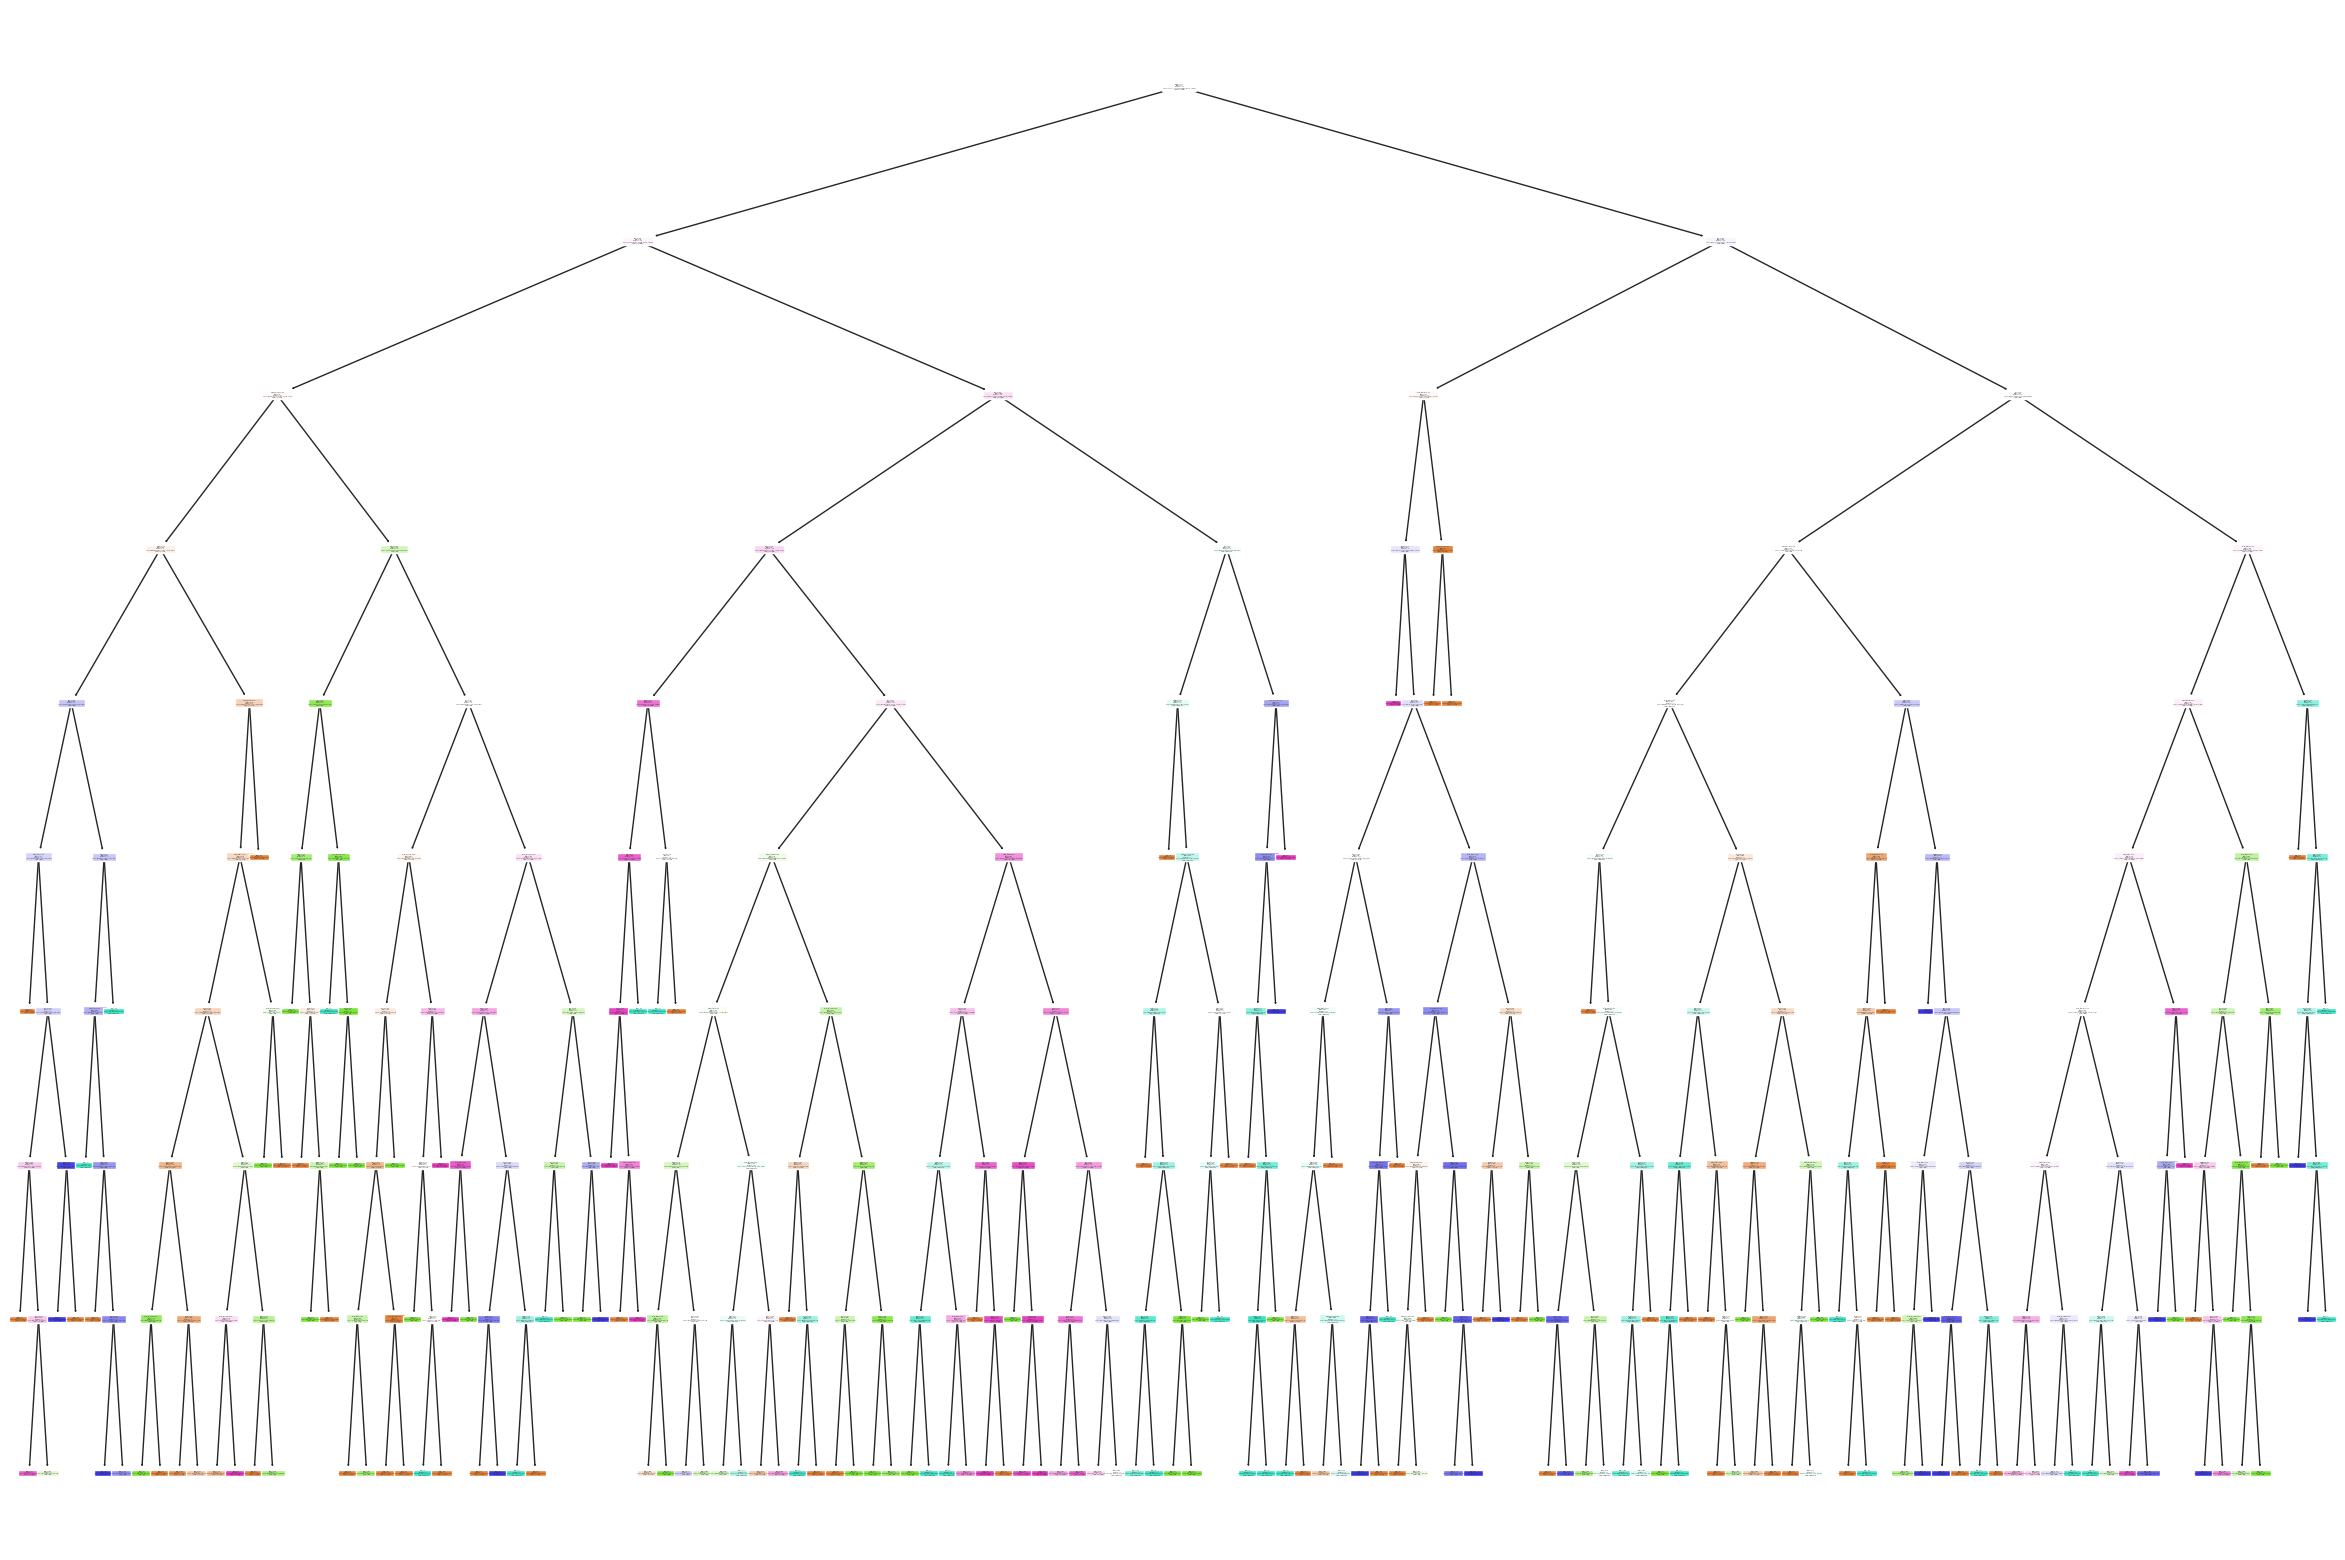

In [12]:
tree_to_plot = 2 

plt.figure(figsize=(30,20))
plt.rcParams['lines.linewidth'] = 0.3
plot_tree(clf.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

In [ ]:
# from sklearn.tree import export_graphviz
# from graphviz import Source

# export_graphviz(clf.estimators_[0], out_file='random_forest.dot', feature_names=feature_names, filled=True, class_names=class_names)

# source = Source.from_file('random_forest.dot', executable='E:/Python311/Lib/site-packages/graphviz/dot')
# source.render('random_forest', format='pdf')

In [9]:
# plt.figure(figsize=(30,20))
# # plot_tree(clf, filled=True)
# plt.rcParams['lines.linewidth'] = 0.3
# # plot_tree(clf, feature_names=feature_names, filled=True, class_names=class_names)
# plot_tree(clf, feature_names=X.columns, filled=True, class_names=y)
# plt.savefig('DT_D.pdf', format='pdf', dpi=300)  

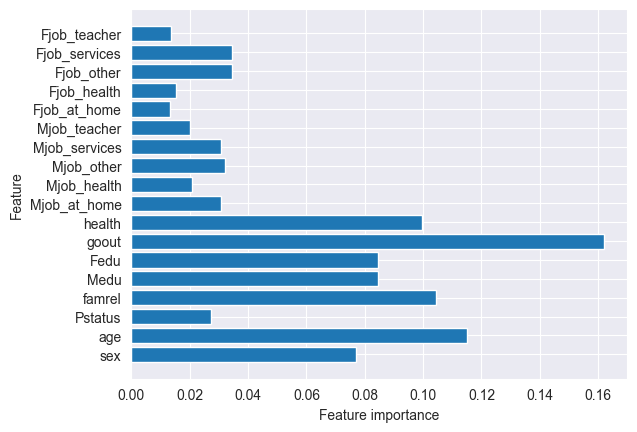

In [13]:
def plot_feature_importances(model):
    n_features = bunch.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), bunch.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(clf)